<br>
<h2 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> Health Insurance: EDA - Statistical Analysis - Hypothesis Testing</h2> 
<br>

<p style = "font-size:30px; color: #007580 ;background-color:  ; text-align: left; border-radius: 5px 5px; padding: 5px" ><strong> Here are my other notebooks, please have a look and definitely you will find it useful. Happy reading 🙂 </strong></p>
<ol>
<li><a href ="https://www.kaggle.com/vinayakshanawad/industrial-safety-complete-solution">Industrial Safety - Complete Solution</a></li>
<li><a href ="https://www.kaggle.com/vinayakshanawad/eda-statistical-analysis-hypothesis-testing">EDA - Statistical Analysis - Hypothesis Testing</a></li>
<li><a href ="https://www.kaggle.com/vinayakshanawad/random-forest-with-bootstrap-sampling-for-beginner">Random Forest with Bootstrap Sampling for beginner</a></li>
<li><a href ="https://www.kaggle.com/vinayakshanawad/amazon-electronics-eda-recommender-system">Amazon Electronics - EDA - Recommender System</a></li>
<li><a href ="https://www.kaggle.com/vinayakshanawad/personal-loan-logistic-reg-accuracy-90-41">Personal Loan - Logistic Reg - Accuracy = 90.41%</a></li>
</ol>

<a id = '0'></a>
<h2 style = "font-family: garamond; font-size: 40px; font-style: normal; letter-spcaing: 3px; background-color: #007580; color : #fed049; border-radius: 5px 5px; text-align:center; font-weight: bold" >Table of Contents</h2> 

1. [Overview](#1.0)
2. [Import the necessary libraries](#2.0)
3. [Data Collection](#3.0)
4. [EDA (Data Analysis and Preparation)](#4.0)
    - [Univariate Analysis](#4.1)
    - [Bivariate Analysis and Hypothesis testing](#4.2)
5. [Summary](#5.0)

<a id = '1.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 1. Overview </h2> 

### Data Description:

The data at hand contains medical costs of people characterized by certain attributes.

### Domain:

Healthcare

### Context:

Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### Attribute Information:

**age:** age of primary beneficiary

**sex:** insurance contractor gender, female, male

**bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children:** Number of children covered by health insurance / Number of dependents

**smoker:** Smoking

**region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges:** Individual medical costs billed by health insurance.

### Objective:

We want to see if we can dive deep into this data to find some valuable insights.

<a id = '2.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 2. Import the necessary libraries </h2> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols

import statsmodels.api as sm

<a id = '3.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 3. Data Collection </h2> 

In [2]:
# Reading Insurance data
df = pd.read_csv("../input/health-insurance-dataset/Health_insurance.csv")

In [3]:
# Get top 10 rows in Insurance data frame
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


<a id = '4.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 4. EDA (Data Analysis and Preparation) </h2> 

<p style = "font-size:20px; color: #007580 "><strong> Shape of the data </strong></p> 

In [4]:
# Get the shape of Insurance data frame
df.shape

(1338, 7)

In [5]:
print("Number of rows = {} and number of columns = {} in Insurance data frame".format(df.shape[0], df.shape[1]))

Number of rows = 1338 and number of columns = 7 in Insurance data frame


<p style = "font-size:20px; color: #007580 "><strong> Data type of each attribute </strong></p> 

In [6]:
print("Data type of each attribute in Insurance data frame")

df.dtypes

Data type of each attribute in Insurance data frame


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<p style = "font-size:20px; color: #007580 "><strong> Checking the presence of missing values </strong></p> 

In [7]:
print("Number of missing values in Insurance data frame")

df.isnull().sum()

Number of missing values in Insurance data frame


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<p style = "font-size:20px; color: #007580 "><strong> 5 point summary of numerical attributes </strong></p> 

In [8]:
print("Five point summary of numerical attributes")

df.describe().T

Five point summary of numerical attributes


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* **Looking at the age column, data is uniformly distributed**

* **Very few people have more than 2 children. 75% of the people have 2 or less children**

* **Charges are skewed to higer values**

<p style = "font-size:20px; color: #007580 "><strong> Distribution of ‘bmi’, ‘age’ and ‘charges’ columns </strong></p> 

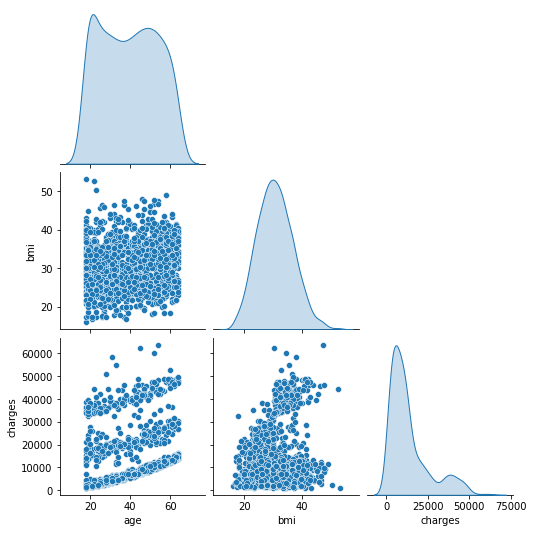

In [9]:
df_attr = df.iloc[:, [0,2,6]] # Select ‘age’, ‘bmi’ and ‘charges’ columns.

sns.pairplot(df_attr, diag_kind ="kde", corner = True); # pairplot

* **Age column seems to be uniformly distributed**
* **BMI column seems to be normally distributed**
* **Charges colum -- Right Skewed Distribution --- charges are skewed to higer values**

<p style = "font-size:20px; color: #007580 "><strong> Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns </strong></p> 

In [10]:
print("Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:")

df_attr.skew(axis = 0, skipna = True)

Skewness of ‘age’, ‘bmi’ and ‘charges’ columns is follows:


age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

* **Age column seems to be uniformly distributed as seen in previous step and there is hardly any skewness**
* **BMI column seems to be normally distributed as seen in previous step and there is very less Skewness**
* **Charges column -- Right Skewed Distribution --- charges are skewed to higer values**

<p style = "font-size:20px; color: #007580 "><strong> Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns </strong></p> 

<a id = '4.1'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 4.1 Univariate analysis </h2> 

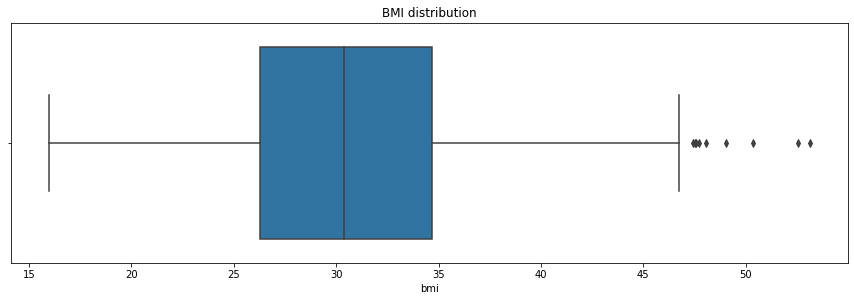

In [11]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("BMI distribution");
sns.boxplot(x=df['bmi']);
plt.show();

* **Above plot shows, there are few points between 47 to 55, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.**

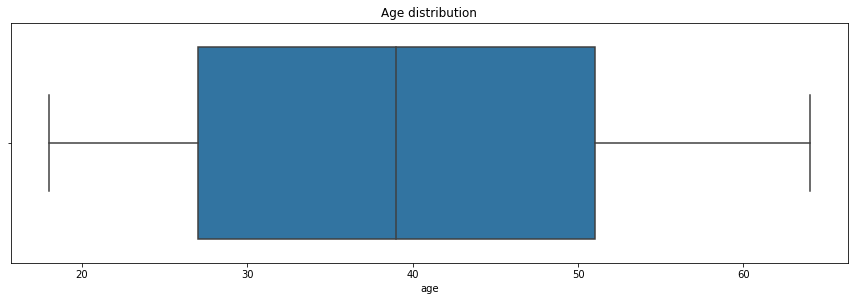

In [12]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Age distribution");
sns.boxplot(x=df['age']);
plt.show();

* **Above plot shows, there are no outliers in 'age' column**

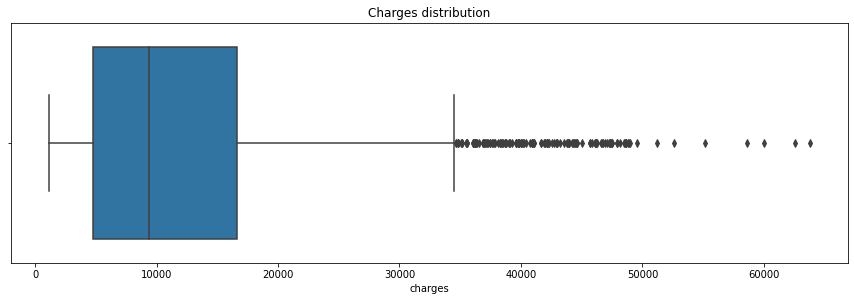

In [13]:
plt.figure(figsize= (15,15))
plt.subplot(3,1,1)
plt.title("Charges distribution");
sns.boxplot(x=df['charges']);
plt.show();

* **Above plot shows, more points between 35000 to 55000, these are outliers as there are not included in the box of other observation i.e no where near the quartiles.**

<p style = "font-size:20px; color: #007580 "><strong> Distribution of categorical columns (include children) </strong></p> 

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


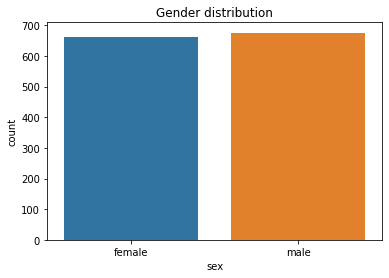

In [14]:
sns.countplot(df['sex']);
plt.title("Gender distribution");
plt.show();

* **Above plot shows, Gender distribution is eqal**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


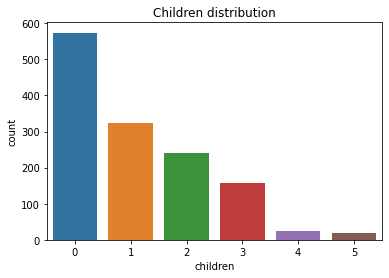

In [15]:
sns.countplot(df['children']);
plt.title("Children distribution");
plt.show();

* **Above plot shows, there are very few customers who have 4 o 5 children and there are most customers who don't have children**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


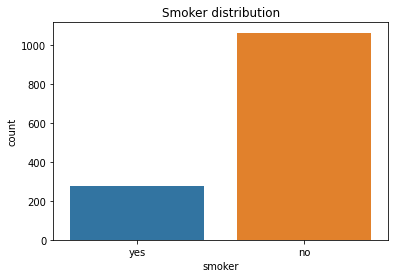

In [16]:
sns.countplot(df['smoker']);
plt.title("Smoker distribution");
plt.show();

* **Above plot shows, there are more non-smokers than smokers in Insurance data frame**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


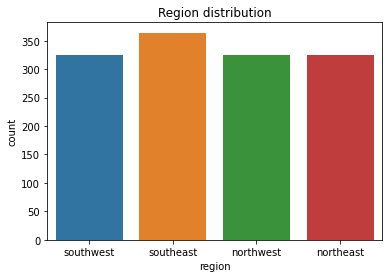

In [17]:
sns.countplot(df['region']);
plt.title("Region distribution");
plt.show();

* **Above plot shows, Region distribution is almost equal**

<p style = "font-size:20px; color: #007580 "><strong> Pair plot that includes all the columns of the data frame </strong></p> 

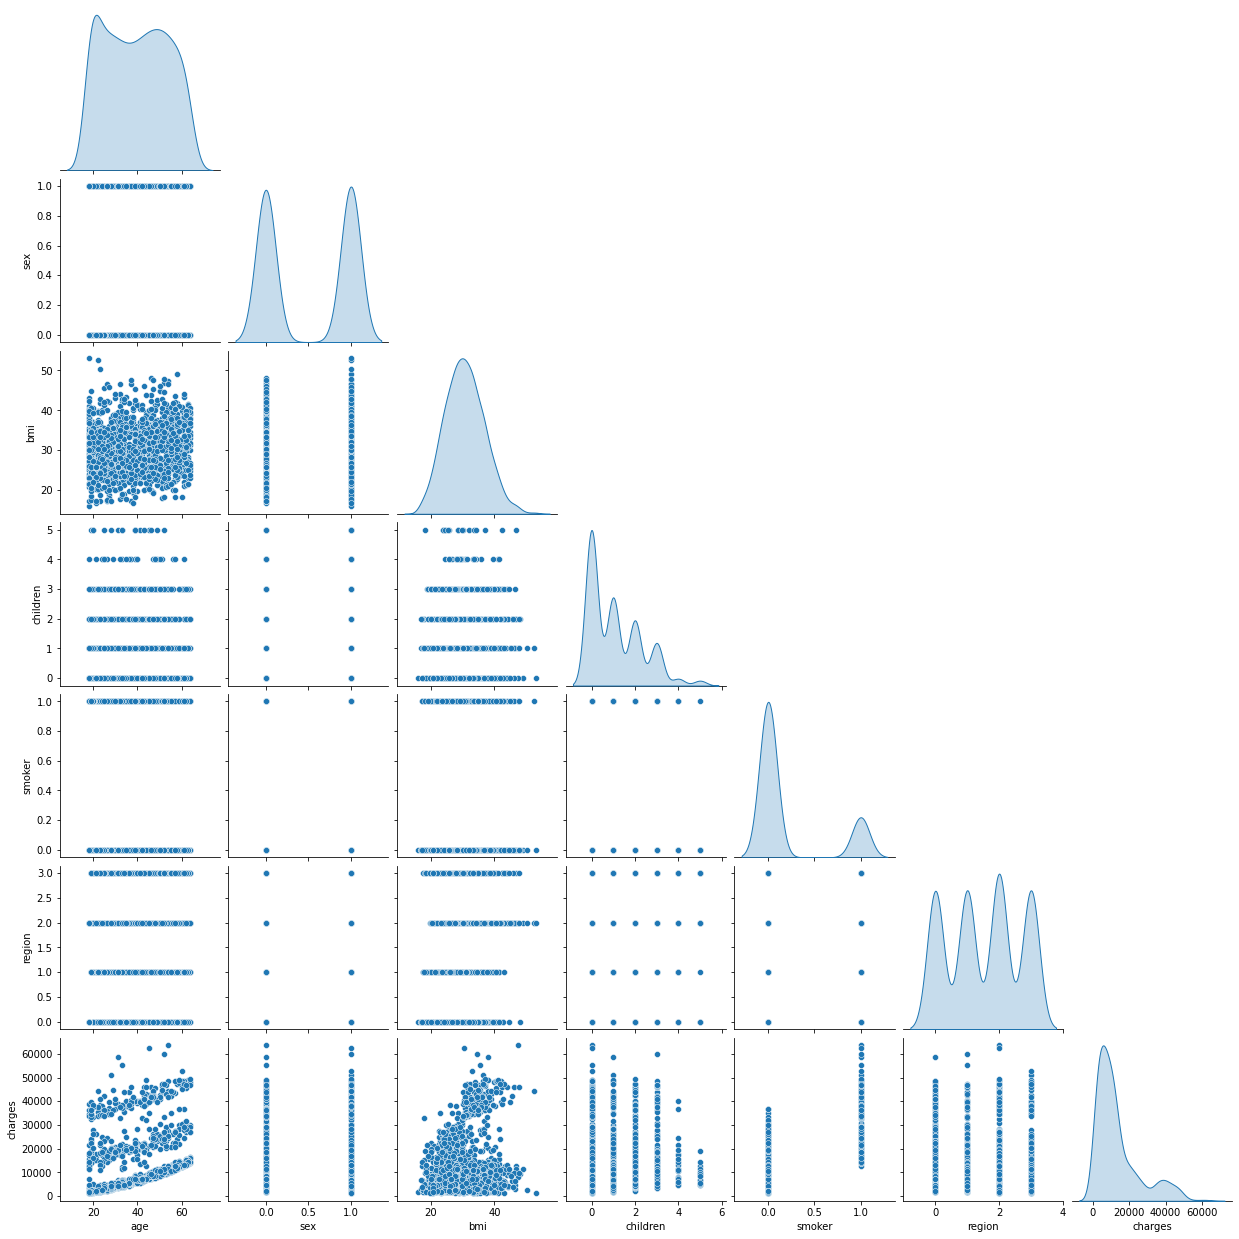

In [18]:
df_encoded = copy.deepcopy(df)
df_encoded.loc[:,['sex', 'smoker', 'region']] = df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(df_encoded, diag_kind ="kde", corner = True)
plt.show()

#### By looking into above graph, we can infer below points 

* **Smokers claimed more money than non-smokers**
* **BMI of male and female customers is almost same**

**But statistically we prove it using Hypothesis testing**

<a id = '4.2'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 4.2 Bivariate analysis and Hypothesis testing </h2> 

<p style = "font-size:20px; color: #007580 "><strong> a. Do charges of people who smoke differ significantly from the people who don't? </strong></p> 

In [19]:
# Checking howmany smokers and non-smokers in Insurance Data frame
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

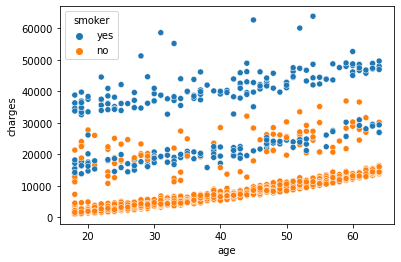

In [20]:
# Check the charges of smokers and non-smokers across different ages
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df);

#### By looking into above graph, we can say "charges of smokers and non-smokers are different". But is the difference statistically significant?

#### 1. State the H0 and Ha

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, **there is no difference in charges of smokers and non-smokers**

* H<sub>A</sub>: x&#772;<sub>2</sub> &ne; x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> &ne; 0, **there is a difference in charges of smokers and non-smokers**

#### 2. Decide the significance level: alpha = 0.05

#### 3. Identify the test-statistic: 2 sample t - test

#### 4. Calculate P_value using test-statistic/t-score

In [21]:
smoker_charges = df[df['smoker'] == 'yes'].charges
non_smoker_charges = df[df['smoker'] == 'no'].charges

t_statistic, p_value = ttest_ind(smoker_charges, non_smoker_charges)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 46.66492117272371
p_value = 8.271435842179102e-283


#### 5. Decide to Reject or Accept Null Hypothesis

In [22]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


#### Hence we reject Null Hypothesis (we have enough (95% and 99%) evidence to prove that there is a difference in charges of smokers and non-smokers)

<p style = "font-size:20px; color: #007580 "><strong> b. Does bmi of males differ significantly from that of females? </strong></p> 

In [23]:
# Checking howmany male and female customers in Insurance Data frame
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

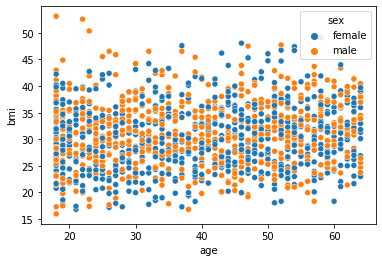

In [24]:
# Check the bmi of male and female customers accross different ages
sns.scatterplot(x = 'age', y = 'bmi', hue = 'sex', data = df);

#### By looking into above graph, we can say "bmi of male and female customers is same". But is it statistically significant?

#### 1. State the H0 and Ha

* H<sub>0</sub>: x&#772;<sub>1</sub> = x&#772;<sub>2</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> = 0, **bmi of male and female customers is same**

* H<sub>A</sub>: x&#772;<sub>2</sub> &ne; x&#772;<sub>1</sub>, or x&#772;<sub>2</sub> - x&#772;<sub>1</sub> &ne; **bmi of male and female customers is different**

#### 2. Decide the significance level: alpha = 0.05

#### 3. Identify the test-statistic: 2 sample t - test

#### 4. Calculate P_value using test-statistic/t-score

In [25]:
male_bmi = df[df['sex'] == 'male'].bmi
female_bmi = df[df['sex'] == 'female'].bmi

t_statistic, p_value = ttest_ind(male_bmi, female_bmi)


print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.08997637178984932


#### 5. Decide to Reject or Accept Null Hypothesis

In [26]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


#### Hence we fail to reject Null Hypothesis (we have enough (95%) evidence to prove that bmi of male and female customers is same)

<p style = "font-size:20px; color: #007580 "><strong> c. Is the proportion of smokers significantly different in different genders? </strong></p> 

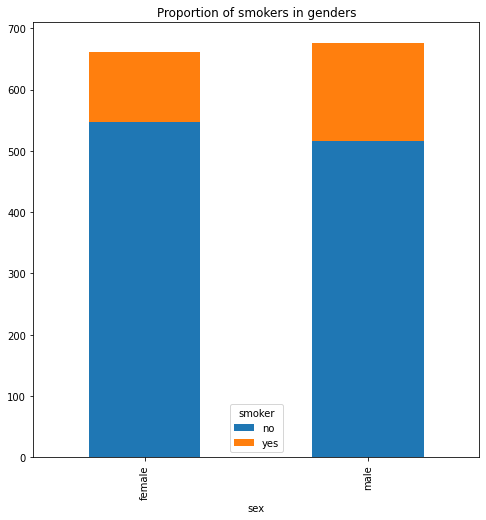

In [27]:
# Check the bmi of male and female customers accross different ages
smoker_gender_table = pd.crosstab(index=df["sex"], columns=df["smoker"])

smoker_gender_table.plot(kind="bar", figsize=(8,8), stacked=True);
plt.title('Proportion of smokers in genders')
plt.show()

#### By looking into above graph, we can say "the proportions of smokers in genders are not equal". But is the difference statistically significant?

#### 1. State the H0 and Ha

#### Ho = The proportions of smokers in genders are equal
#### Ha = The proportions of smokers in genders are not equal

In [28]:
male_smokers = df[df['sex'] == 'male'].smoker.value_counts()[1]

female_smokers = df[df['sex'] == 'female'].smoker.value_counts()[1]

n_males = df.sex.value_counts()[0]

n_females = df.sex.value_counts()[1]

print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


#### 2. Decide the significance level: alpha = 0.05

#### 3. Identify the test-statistic: Z - test of Proportions

#### 4. Calculate P_value using test-statistic

In [29]:
stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = 1.696752635752224
p_value = 0.005324114164320532


#### 5. Decide to Reject or Accept Null Hypothesis

In [30]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : True


#### Hence we reject Null Hypothesis (we have enough (95%) evidence to prove that ,the proportions of smokers in genders are not equal)

<p style = "font-size:20px; color: #007580 "><strong> d. Is the distribution of bmi across women with no children, one child and two children, the same? </strong></p> 

In [31]:
# Check the bmi of women with no children, one child and two children

zero_child = df[df['children'] == 0]
women_zero_child_bmi = zero_child[zero_child['sex'] == 'female'].bmi

one_child = df[df['children'] == 1]
women_one_child_bmi = one_child[one_child['sex'] == 'female'].bmi

two_child = df[df['children'] == 2]
women_two_child_bmi = two_child[two_child['sex'] == 'female'].bmi

children_bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'children': 'zero', 'bmi':women_zero_child_bmi})
df2            = pd.DataFrame({'children': 'one', 'bmi':women_one_child_bmi})
df3            = pd.DataFrame({'children': 'two', 'bmi':women_two_child_bmi})

children_bmi_df = children_bmi_df.append(df1) 
children_bmi_df = children_bmi_df.append(df2) 
children_bmi_df = children_bmi_df.append(df3)

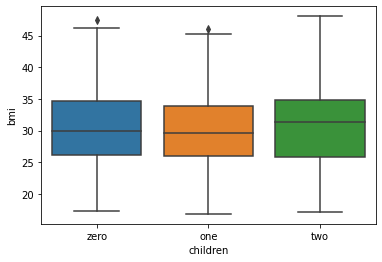

In [32]:
sns.boxplot(x = "children", y = "bmi", data = children_bmi_df);

#### The boxplots show almost similar shapes, location and spreads for women with 0, 1, and 2 children but few outlier for women with 0 and 1 child.

#### 1. State the H0 and Ha

#### Ho = $\mu1$ = $\mu2$ = $\mu3$  -- Women with no children, one child and two children has no effect on bmi
#### Ha = At least one $\mu$ differs -- Women with no children, one child and two children has an effect on bmi

#### 2. Decide the significance level: alpha = 0.05

#### 3. Identify the test-statistic

Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

#### 4. Calculate P_value using ANOVA table

In [33]:
mod = ols('bmi ~ children', data = children_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

p_value = aov_table['PR(>F)'][0]

                sum_sq     df         F    PR(>F)
children     24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


#### 5. Decide to Reject or Accept Null Hypothesis

In [34]:
reject_null = False
if p_value < 0.05:
    reject_null = True 
else: 
    reject_null = False
    
print("reject null? : " + str(reject_null))

reject null? : False


#### Hence we fail to reject Null Hypothesis (we have enough (95% and 99%) evidence to prove that women with no children, one child and two children has no effect on bmi)

<a id = '5.0'></a>
<h2 style = "font-size:35px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px"> 5. Summary </h2> 
<br>
<br>
<strong>What happend so far?</strong>

<ol>
<li>Explored dataset stats and missing values of the dataset.</li>
<li>Checked the outliers in dataset, BMI and Charges columns are having outliers.</li>
<li>Difference in charges of smokers and non-smokers.</li>
<li>BMI of male and female customers is same.</li>
<li>Proportions of smokers in genders are not equal.</li>
<li>Women with no children, one child and two children has no effect on bmi.</li>
</ol>
   
<br>
   
<p style = "font-size:30px; color: #007580 "><strong> Thanks for reading. Feature engineering and model building need to be done, will update soon... </strong></p>